In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import mannwhitneyu
from prophet import Prophet
from prophet.plot import plot_plotly
from sklearn.metrics import mean_squared_error

np.random.seed(4587)

In [220]:
df = pd.read_csv('bicicletas.csv')
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [221]:
df.shape

(17429, 10)

In [222]:
df.isnull().sum().sort_values(ascending=False)

temperatura         23
sensacao_termica    23
data_hora            0
contagem             0
umidade              0
velocidade_vento     0
clima                0
feriado              0
fim_de_semana        0
estacao              0
dtype: int64

In [223]:
df.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17429.000000,17406.000000,17406.000000,17429.000000,17429.000000
mean,1143.330484,12.475487,11.529664,72.325851,15.913482
std,1085.332338,5.571269,6.614472,14.312719,7.895780
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1672.000000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


In [224]:
df['temperatura'] = df['temperatura'].interpolate(method = 'linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method = 'linear')
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [225]:
df.isnull().sum().sort_values(ascending=False)

data_hora           0
contagem            0
temperatura         0
sensacao_termica    0
umidade             0
velocidade_vento    0
clima               0
feriado             0
fim_de_semana       0
estacao             0
dtype: int64

In [226]:
df.duplicated().sum()

15

In [227]:
df[df.duplicated(keep = False)].sort_values(['data_hora']).head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão


In [228]:
df_limpo = df.drop_duplicates()
df_limpo.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [229]:
df_limpo.reset_index(inplace = True, drop = True)
df_limpo.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [230]:
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


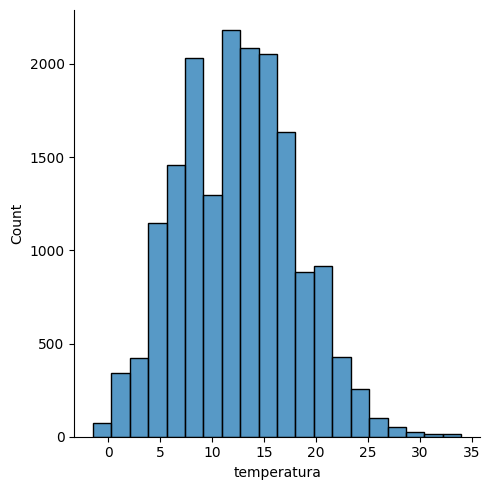

In [231]:
sns.displot(df_limpo, x = 'temperatura', bins = 20)
plt.show()

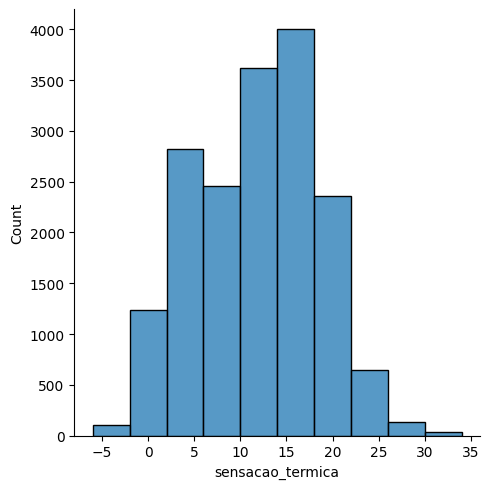

In [232]:
sns.displot(df_limpo, x = 'sensacao_termica', bins = 10)
plt.show()

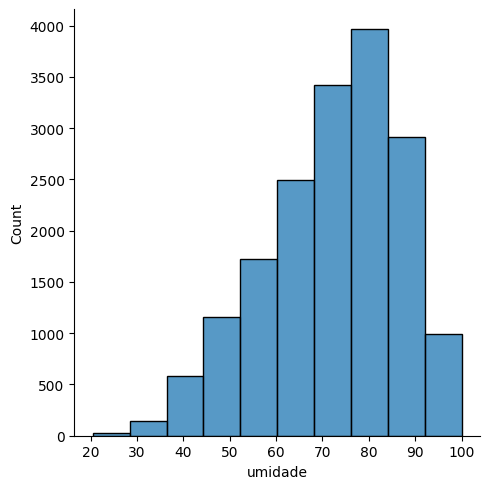

In [233]:
sns.displot(df_limpo, x = 'umidade', bins = 10)
plt.show()

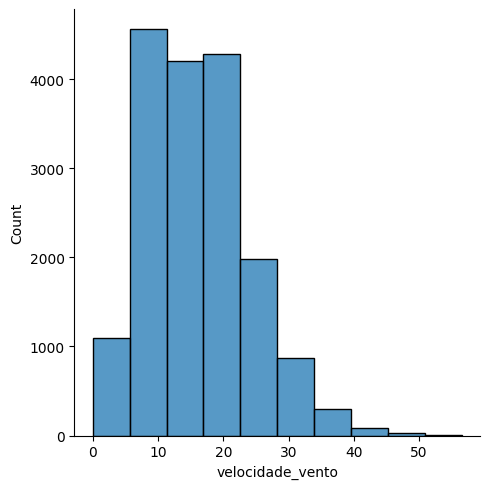

In [234]:
sns.displot(df_limpo, x = 'velocidade_vento', bins = 10)
plt.show()

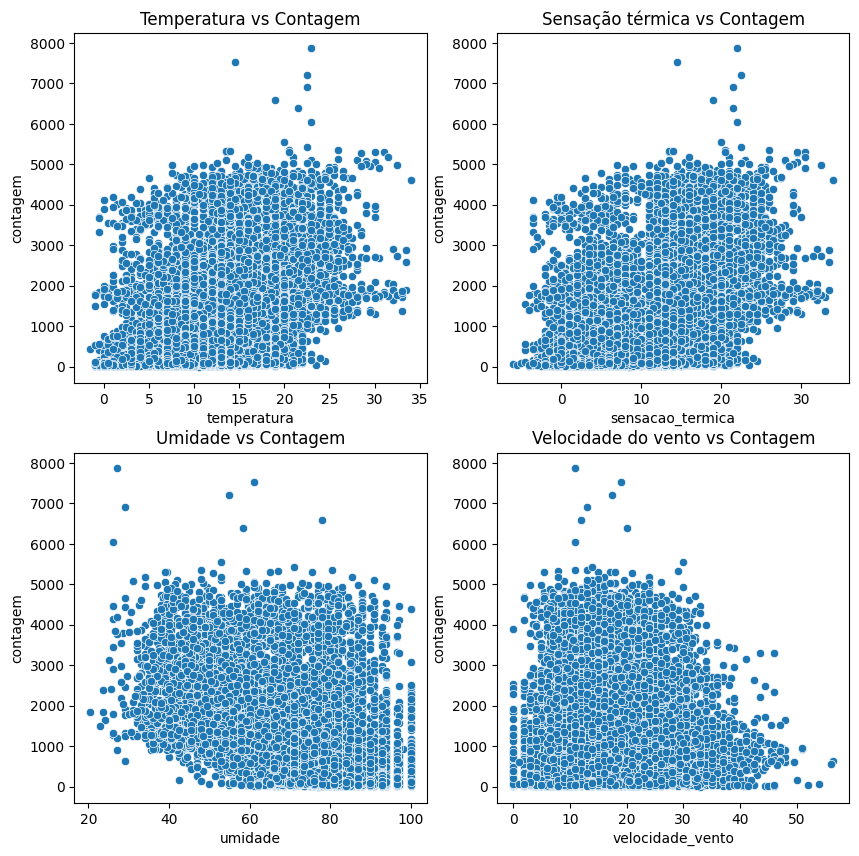

In [235]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

sns.scatterplot(df_limpo, x = 'temperatura', y = 'contagem', ax = axs[0, 0])
axs[0, 0].set_title('Temperatura vs Contagem')

sns.scatterplot(df_limpo, x = 'sensacao_termica', y = 'contagem', ax = axs[0, 1])
axs[0, 1].set_title('Sensação térmica vs Contagem')

sns.scatterplot(df_limpo, x = 'umidade', y = 'contagem', ax = axs[1, 0])
axs[1, 0].set_title('Umidade vs Contagem')

sns.scatterplot(df_limpo, x = 'velocidade_vento', y = 'contagem', ax = axs[1, 1])
axs[1, 1].set_title('Velocidade do vento vs Contagem')

plt.show()

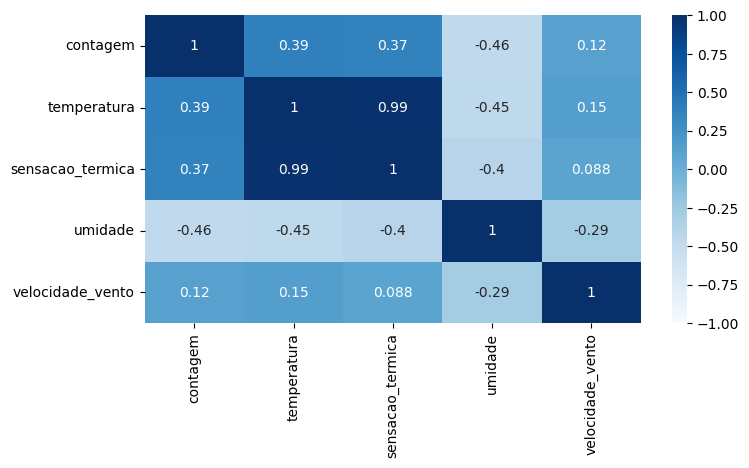

In [236]:
plt.figure(figsize = (8, 4))

sns.heatmap(df_limpo.corr(numeric_only = True), annot = True, cmap = 'Blues', vmax = 1, vmin = -1)
plt.show()

In [237]:
df_limpo.describe(include = [object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [238]:
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
    print(f'Coluna: {col}')
    print(sorted(df_limpo[col].unique()), end = '\n\n')

Coluna: clima
['Chuva com trovoadas', 'Chuva leve', 'Céu limpo', 'Neve', 'Nublado', 'Parcialmente nublado']

Coluna: feriado
['Não', 'Sim']

Coluna: fim_de_semana
['Não', 'Sim']

Coluna: estacao
['Inverno', 'Outono', 'Primavera', 'Verão']



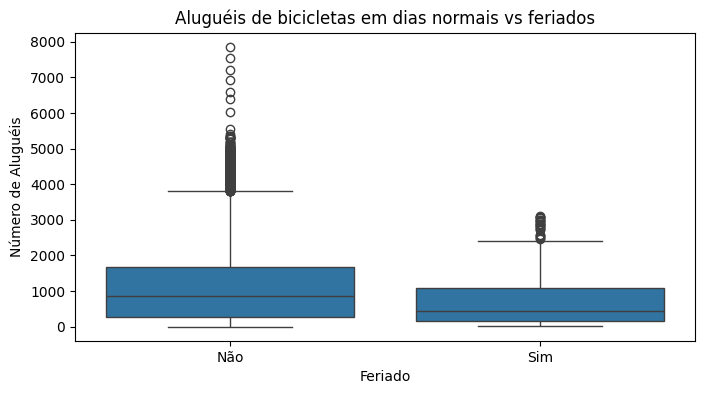

In [239]:
plt.figure(figsize = (8, 4))
sns.boxplot(x='feriado', y='contagem', order=['Não', 'Sim'], data=df_limpo)
plt.title('Aluguéis de bicicletas em dias normais vs feriados')
plt.xlabel('Feriado')
plt.ylabel('Número de Aluguéis')
plt.show()

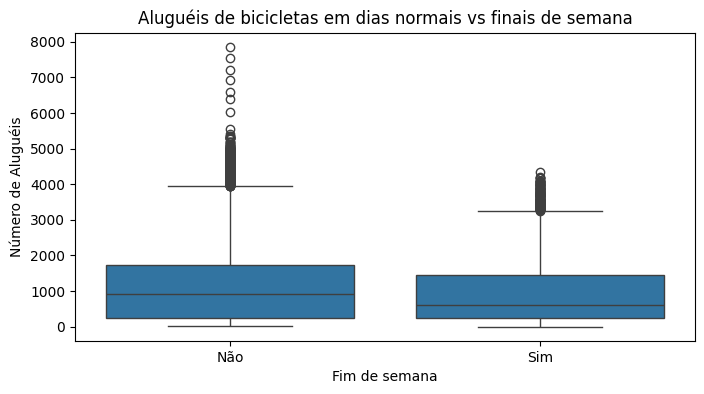

In [240]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='fim_de_semana', y='contagem', order=['Não', 'Sim'], data=df_limpo)
plt.title('Aluguéis de bicicletas em dias normais vs finais de semana')
plt.xlabel('Fim de semana')
plt.ylabel('Número de Aluguéis')
plt.show()


In [241]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_feriado

feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64

In [242]:
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()
mediana_fim_de_semana

fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64

In [243]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().sort_values(ascending=False)
df_clima

clima
Céu limpo               7146847
Parcialmente nublado    6965558
Nublado                 4243887
Chuva leve              1526461
Neve                      15051
Chuva com trovoadas        8168
Name: contagem, dtype: int64

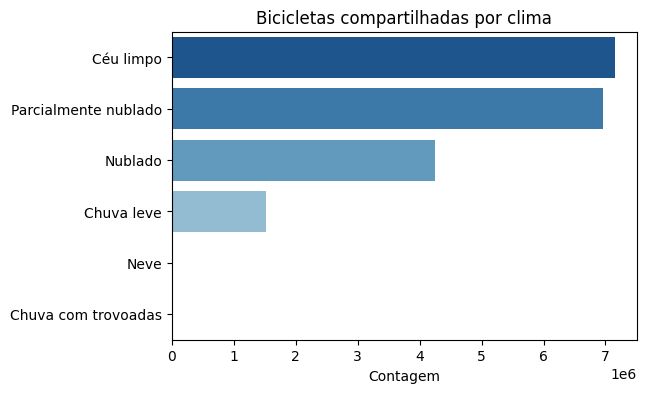

In [244]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=df_clima, y='clima', x='contagem', hue='clima', palette='Blues_r', orient='h')
plt.title('Bicicletas compartilhadas por clima')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

<Axes: xlabel='estacao', ylabel='contagem'>

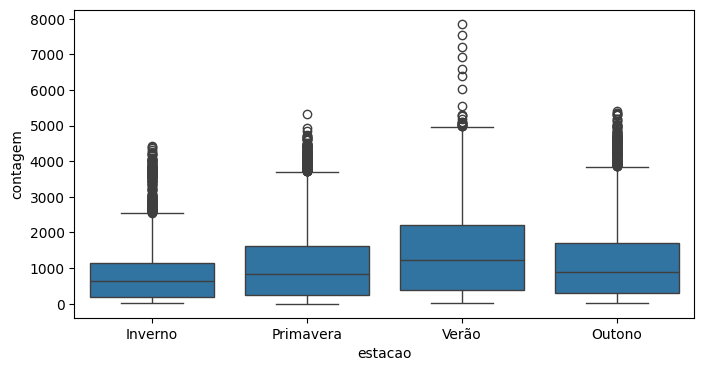

In [245]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='estacao', y='contagem', data=df_limpo)

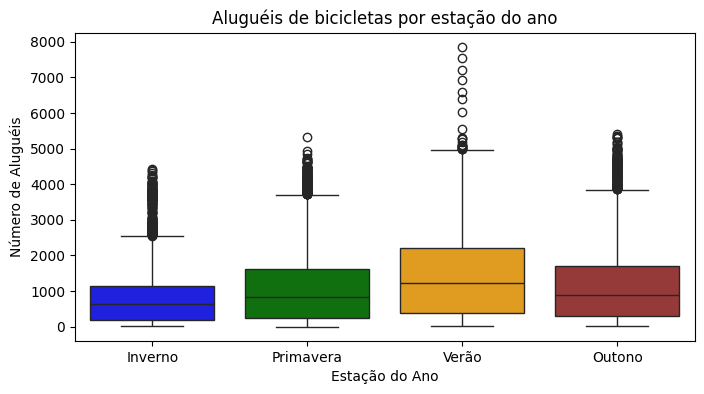

In [246]:
plt.figure(figsize=(8, 4))
paleta_cores = {'Primavera': 'green', 'Verão': 'orange', 'Outono': 'brown', 'Inverno': 'blue'}
sns.boxplot(x='estacao', y='contagem', data=df_limpo, hue='estacao', palette=paleta_cores)
plt.title('Aluguéis de bicicletas por estação do ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Aluguéis')
plt.show()

In [247]:
df_limpo.groupby('estacao')['contagem'].median()

estacao
Inverno       632.0
Outono        898.0
Primavera     823.0
Verão        1214.0
Name: contagem, dtype: float64

In [248]:
primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')
u_statistic, p_value

(9044682.5, 0.0004762100221646297)

In [249]:
df_limpo['data_hora'] = pd.to_datetime(df_limpo['data_hora'])
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.3+ MB


C:\Users\Marcos\AppData\Local\Temp\ipykernel_12712\1014996380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['data_hora'] = pd.to_datetime(df_limpo['data_hora'])


In [250]:
df_limpo['mes'] = df_limpo['data_hora'].dt.month
df_limpo['horario'] = df_limpo['data_hora'].dt.hour
df_limpo['data_hora'] = df_limpo['data_hora'].dt.date
df_limpo = df_limpo.rename({'data_hora' : 'data'}, axis = 1)
df_limpo['data'] = pd.to_datetime(df_limpo['data'])

df_limpo.head()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_12712\3837684015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['mes'] = df_limpo['data_hora'].dt.month
C:\Users\Marcos\AppData\Local\Temp\ipykernel_12712\3837684015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['horario'] = df_limpo['data_hora'].dt.hour
C:\Users\Marcos\AppData\Local\Temp\ipykernel_12712\3837684015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


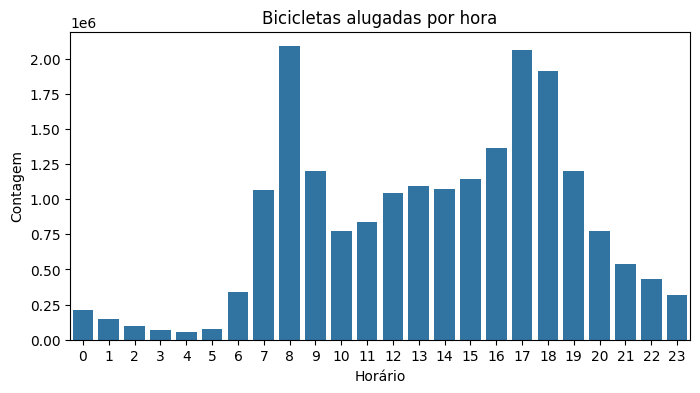

In [251]:
df_por_hora = df_limpo.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize = (8, 4))
sns.barplot(data = df_por_hora, x = 'horario', y = 'contagem')
plt.title('Bicicletas alugadas por hora')
plt.xlabel('Horário')
plt.ylabel('Contagem')

plt.show()

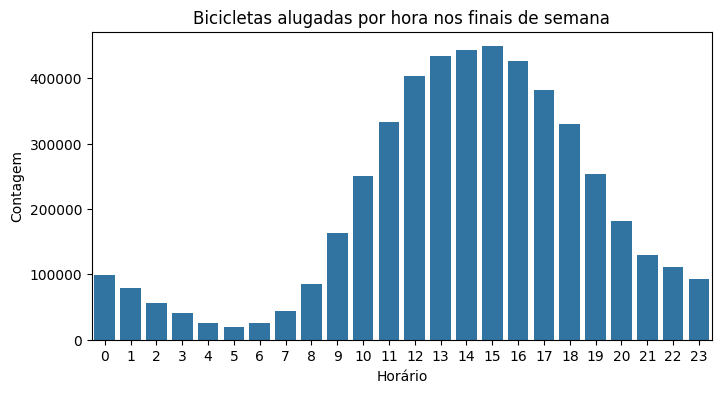

In [252]:
df_fim_de_semana = df_limpo[df_limpo['fim_de_semana'] == 'Sim']
alugueis_fim_de_semana = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize = (8, 4))
sns.barplot(data = alugueis_fim_de_semana, x = 'horario', y = 'contagem')
plt.title('Bicicletas alugadas por hora nos finais de semana')
plt.xlabel('Horário')
plt.ylabel('Contagem')

plt.show()

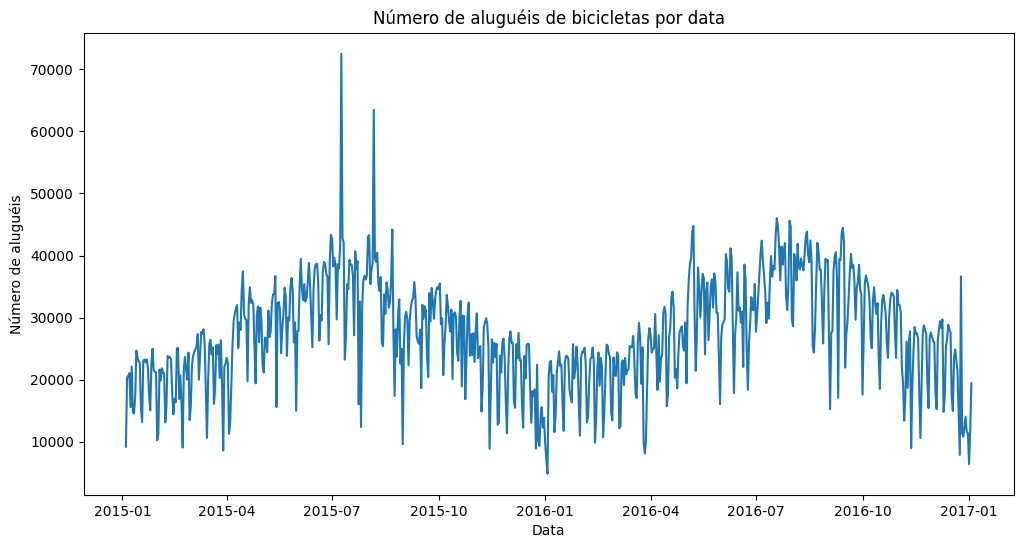

In [253]:
df_tempo = df_limpo.groupby('data')['contagem'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_tempo, x='data', y='contagem')
plt.title('Número de aluguéis de bicicletas por data')
plt.xlabel('Data')
plt.ylabel('Número de aluguéis')
plt.show()

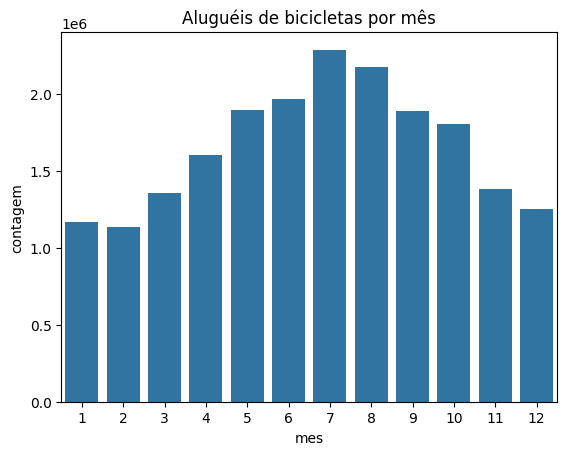

In [254]:
alugueis_mensais = df_limpo.groupby('mes')['contagem'].sum().reset_index()

sns.barplot(data=alugueis_mensais, x='mes', y='contagem')
plt.title('Aluguéis de bicicletas por mês')
plt.show()

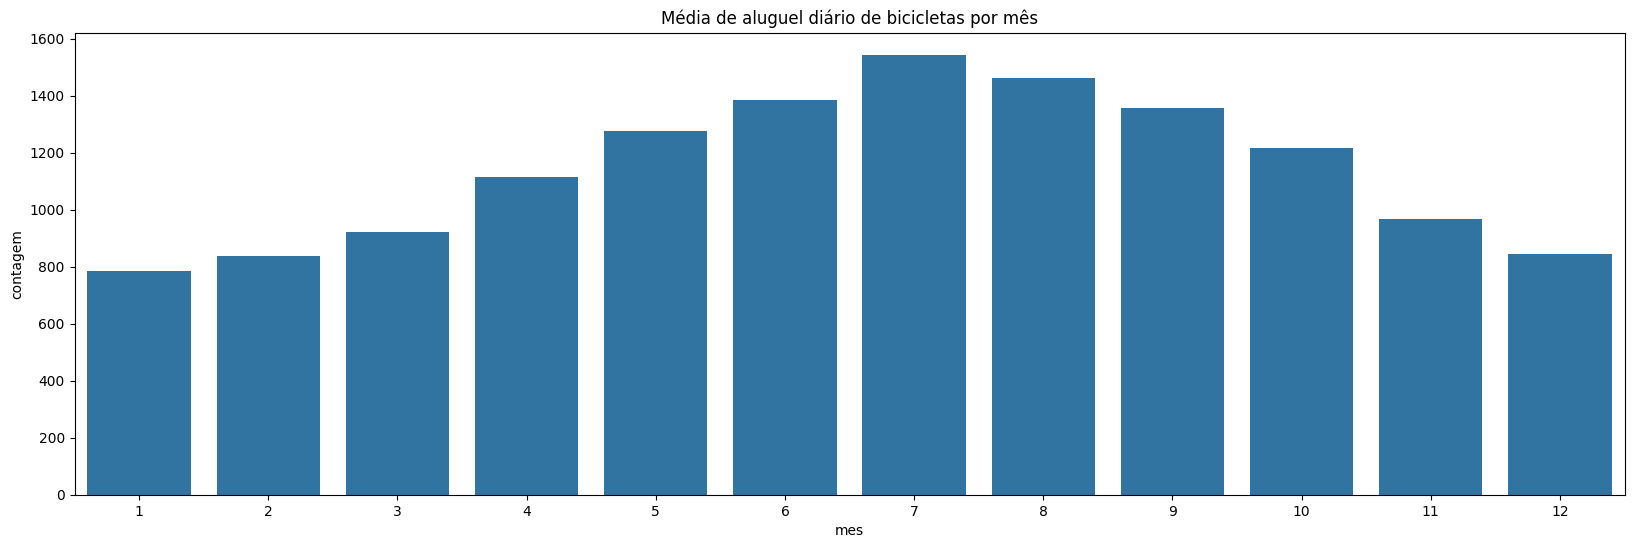

In [255]:
plt.figure(figsize = (20,6))
sns.barplot(data = df_limpo.groupby('mes')['contagem'].mean().reset_index(), x='mes', y='contagem')
plt.title('Média de aluguel diário de bicicletas por mês')
plt.show()


In [256]:
df_prophet = df_limpo[['data', 'contagem']].rename({'data' : 'ds', 'contagem' : 'y'}, axis = 1)
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [257]:
modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods = 90, freq = 'D')
previsao = modelo.predict(futuro)

11:09:44 - cmdstanpy - INFO - Chain [1] start processing
11:09:44 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


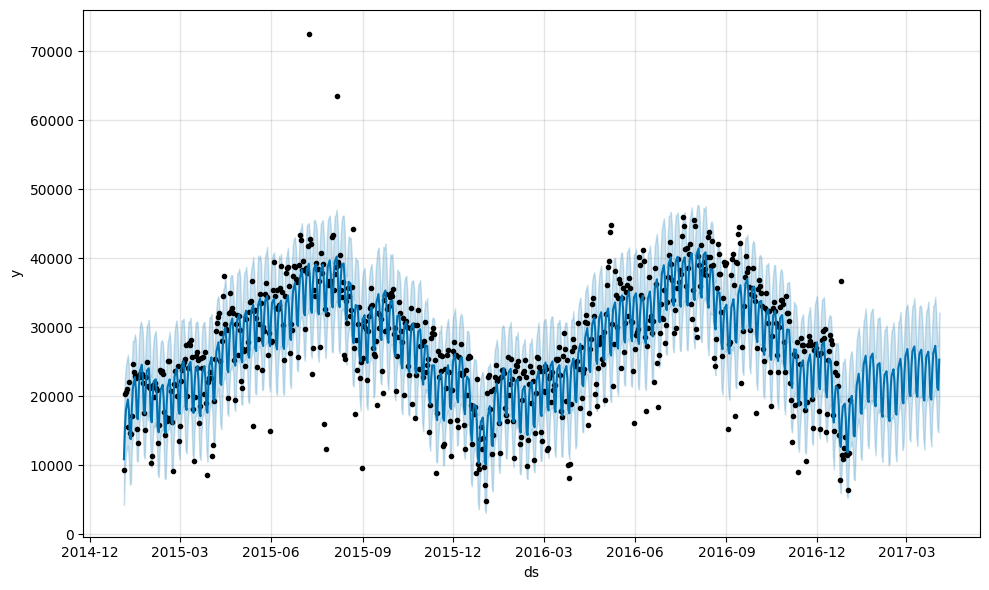

In [258]:
fig1 = modelo.plot(previsao)

In [259]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10867.436698,4248.681464,17121.906796
1,2015-01-05,15279.441783,8890.570729,22594.402077
2,2015-01-06,17984.434533,11808.797686,24375.208227
3,2015-01-07,18716.667970,12325.180844,25327.444016
4,2015-01-08,19529.925007,12793.113904,25988.199728
...,...,...,...,...
815,2017-03-30,27303.158028,20890.868485,34391.306911
816,2017-03-31,25530.545826,19354.636545,32029.859379
817,2017-04-01,21214.278115,15449.716281,27696.529702
818,2017-04-02,20897.149453,14749.799059,27208.615968


C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0

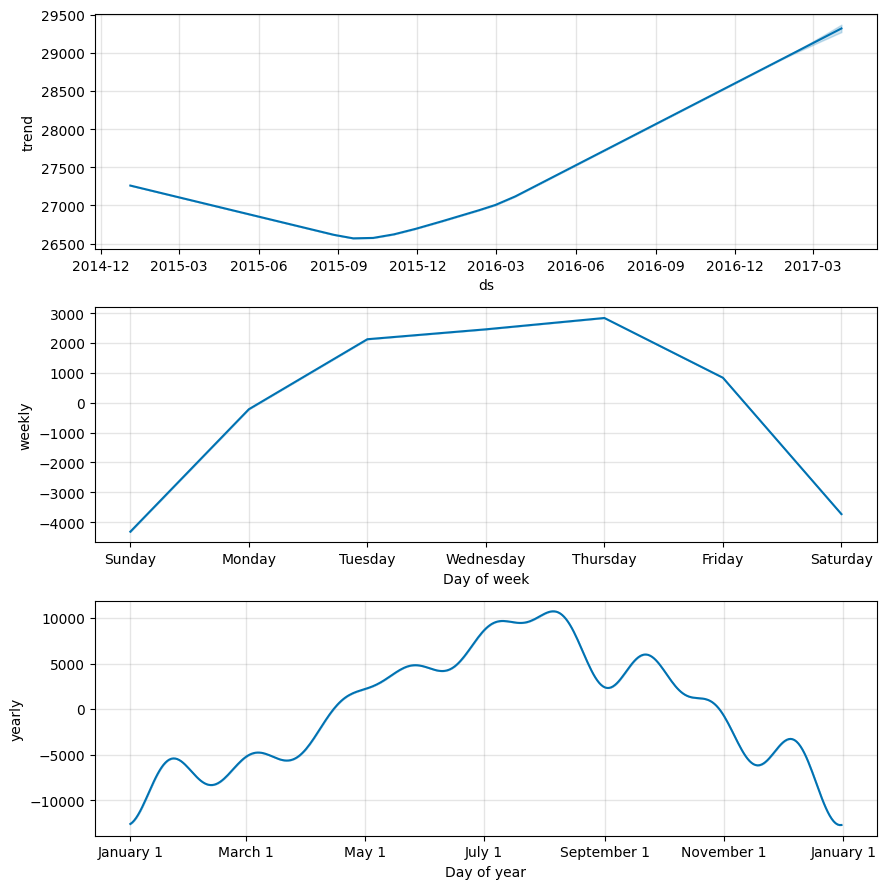

In [260]:
fig2 = modelo.plot_components(previsao)

In [261]:
df_treino = pd.DataFrame()
df_treino['ds'] = df_prophet['ds'][:584]
df_treino['y'] = df_prophet['y'][:584]

df_teste = pd.DataFrame()
df_teste['ds'] = df_prophet['ds'][584:]
df_teste['y'] = df_prophet['y'][584:]


In [262]:
modelo = Prophet()
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

11:09:46 - cmdstanpy - INFO - Chain [1] start processing
11:09:46 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


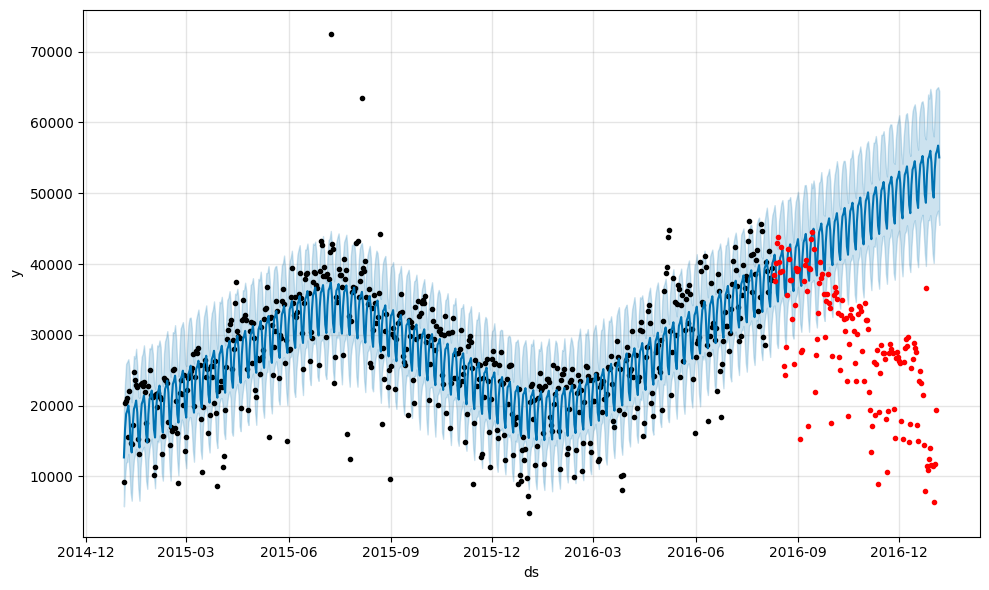

In [263]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


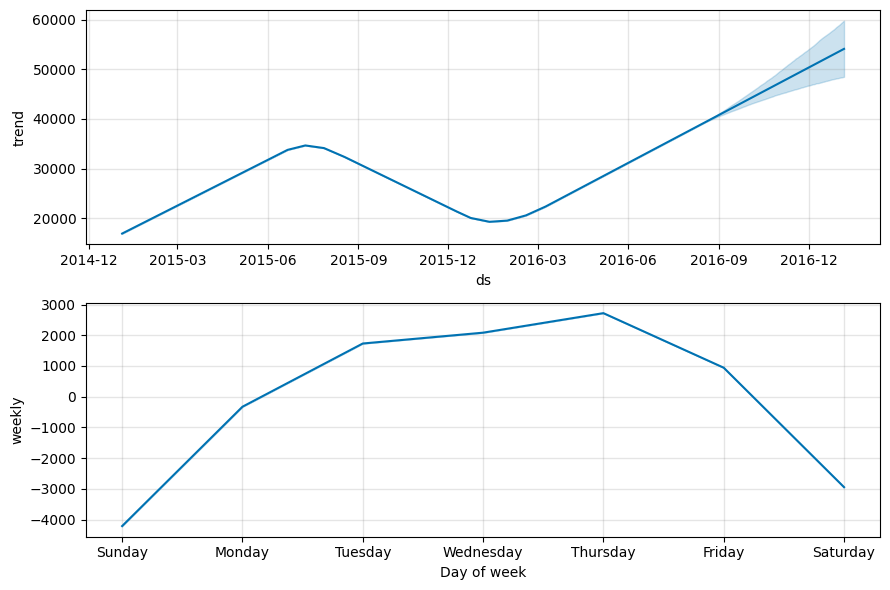

In [264]:
fig2 = modelo.plot_components(previsao)

In [265]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on = 'ds')
df_comparacao.head()

,ds,yhat,y
0,2016-08-10,40578.718163,38430
1,2016-08-11,41319.073556,37626
2,2016-08-12,39648.849935,40159
3,2016-08-13,35867.643110,43041
4,2016-08-14,34706.462122,43848


In [266]:
rmse = np.sqrt(mean_squared_error(df_comparacao['y'], df_comparacao['yhat']))
print(f'RMSE: {round(rmse, 3)}')

RMSE: 21471.213


In [267]:
modelo = Prophet(yearly_seasonality=True)
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

11:09:48 - cmdstanpy - INFO - Chain [1] start processing
11:09:48 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


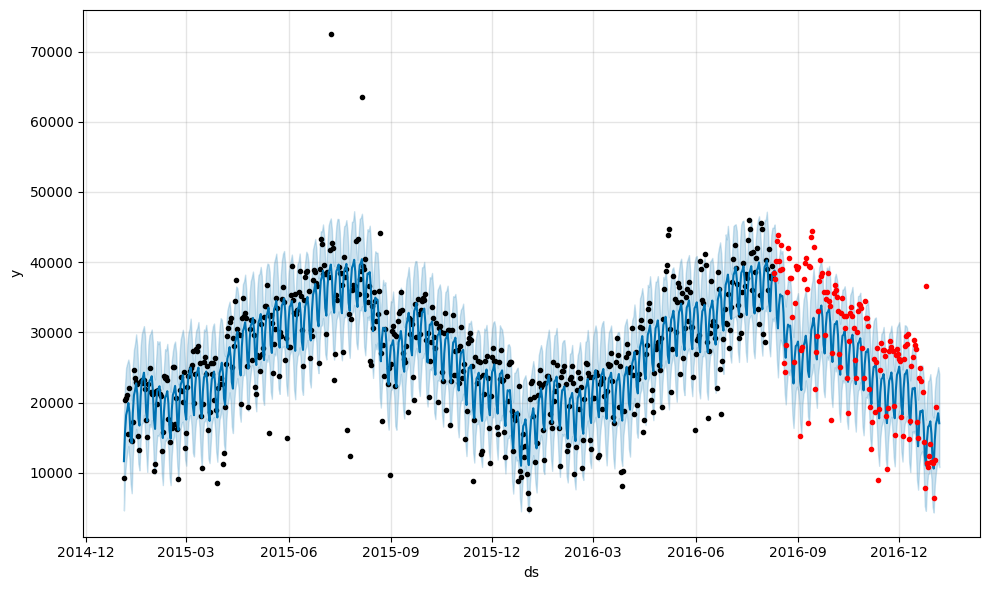

In [268]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0

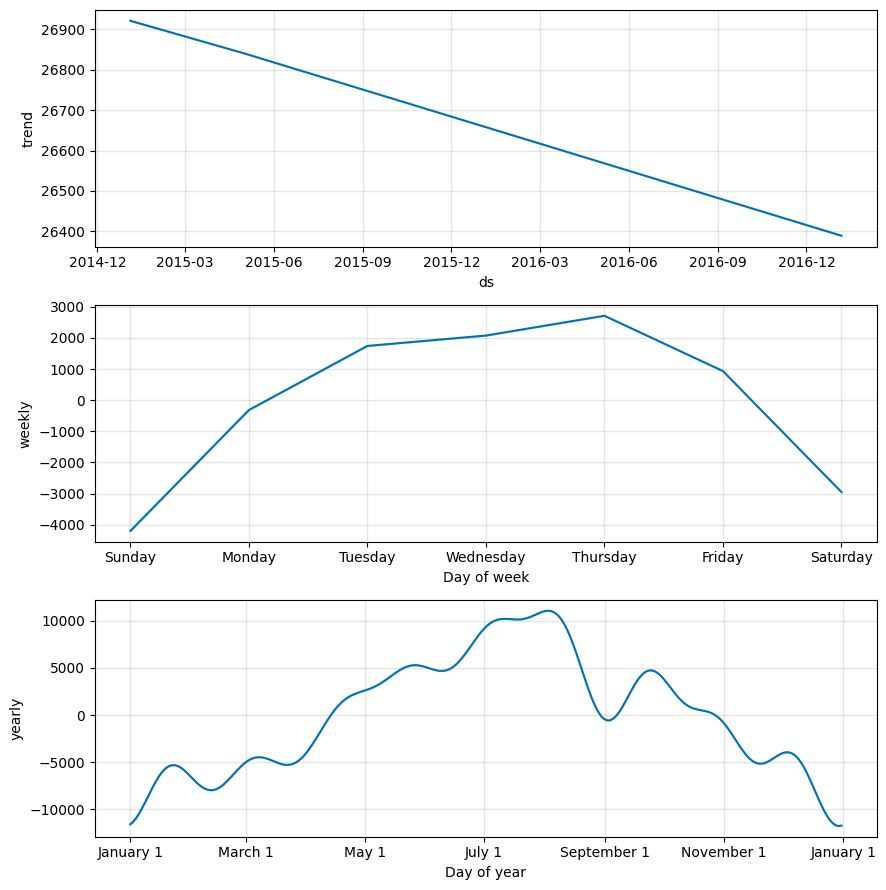

In [269]:
fig2 = modelo.plot_components(previsao)

In [270]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on = 'ds')
df_comparacao.head()

,ds,yhat,y
0,2016-08-10,38535.991663,38430
1,2016-08-11,38820.212318,37626
2,2016-08-12,36645.867170,40159
3,2016-08-13,32314.809863,43041
4,2016-08-14,30575.120022,43848


In [271]:
rmse = np.sqrt(mean_squared_error(df_comparacao['y'], df_comparacao['yhat']))
print(f'RMSE: {round(rmse, 3)}')

RMSE: 6166.3


In [274]:
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [277]:
modelo = Prophet(yearly_seasonality=True)
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)
previsao

11:12:03 - cmdstanpy - INFO - Chain [1] start processing
11:12:03 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,27260.778960,4598.338166,17320.257392,27260.778960,27260.778960,-16393.342262,-16393.342262,-16393.342262,-4318.747137,-4318.747137,-4318.747137,-12074.595125,-12074.595125,-12074.595125,0.0,0.0,0.0,10867.436698
1,2015-01-05,27258.024493,8834.435188,21853.267141,27258.024493,27258.024493,-11978.582711,-11978.582711,-11978.582711,-217.560784,-217.560784,-217.560784,-11761.021927,-11761.021927,-11761.021927,0.0,0.0,0.0,15279.441783
2,2015-01-06,27255.270027,11090.316693,24385.104132,27255.270027,27255.270027,-9270.835494,-9270.835494,-9270.835494,2127.955463,2127.955463,2127.955463,-11398.790957,-11398.790957,-11398.790957,0.0,0.0,0.0,17984.434533
3,2015-01-07,27252.515560,11821.046246,25374.057724,27252.515560,27252.515560,-8535.847590,-8535.847590,-8535.847590,2459.566828,2459.566828,2459.566828,-10995.414418,-10995.414418,-10995.414418,0.0,0.0,0.0,18716.667970
4,2015-01-08,27249.761093,12898.579389,26597.883837,27249.761093,27249.761093,-7719.836086,-7719.836086,-7719.836086,2839.175146,2839.175146,2839.175146,-10559.011231,-10559.011231,-10559.011231,0.0,0.0,0.0,19529.925007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2016-12-30,28768.363986,10408.511525,23267.381982,28768.363986,28768.363986,-11887.349731,-11887.349731,-11887.349731,838.613609,838.613609,838.613609,-12725.963340,-12725.963340,-12725.963340,0.0,0.0,0.0,16881.014255
726,2016-12-31,28774.213949,5909.392781,18662.145994,28774.213949,28774.213949,-16429.293401,-16429.293401,-16429.293401,-3729.003125,-3729.003125,-3729.003125,-12700.290276,-12700.290276,-12700.290276,0.0,0.0,0.0,12344.920548
727,2017-01-01,28780.063911,5284.585524,18556.178285,28780.063911,28780.063911,-16922.467503,-16922.467503,-16922.467503,-4318.747137,-4318.747137,-4318.747137,-12603.720366,-12603.720366,-12603.720366,0.0,0.0,0.0,11857.596408
728,2017-01-02,28785.913873,9728.858394,22517.750926,28785.913873,28785.913873,-12656.786135,-12656.786135,-12656.786135,-217.560784,-217.560784,-217.560784,-12439.225351,-12439.225351,-12439.225351,0.0,0.0,0.0,16129.127738


In [278]:
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [279]:
df_treino = pd.DataFrame()
df_teste = pd.DataFrame()

df_treino['ds'] = sem_outliers['ds'][:505]
df_treino['y'] = sem_outliers['y'][:505]

df_teste['ds'] = sem_outliers['ds'][505:]
df_teste['y'] = sem_outliers['y'][505:]

In [281]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality = True)
modelo_sem_outliers.fit(df_treino)

futuro = modelo_sem_outliers.make_future_dataframe(periods = 150, freq = 'D')
previsao = modelo_sem_outliers.predict(futuro)
previsao.head()

11:20:37 - cmdstanpy - INFO - Chain [1] start processing
11:20:37 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,27399.488112,7454.307773,14842.227981,27399.488112,27399.488112,-16132.273557,-16132.273557,-16132.273557,-4707.115014,-4707.115014,-4707.115014,-11425.158543,-11425.158543,-11425.158543,0.0,0.0,0.0,11267.214555
1,2015-01-05,27399.182291,13191.436815,20557.019639,27399.182291,27399.182291,-10527.323719,-10527.323719,-10527.323719,641.042383,641.042383,641.042383,-11168.366102,-11168.366102,-11168.366102,0.0,0.0,0.0,16871.858572
2,2015-01-06,27398.876470,14743.730700,22119.535681,27398.876470,27398.876470,-8845.524766,-8845.524766,-8845.524766,2027.235658,2027.235658,2027.235658,-10872.760424,-10872.760424,-10872.760424,0.0,0.0,0.0,18553.351704
3,2015-01-07,27398.570649,15516.162492,22898.907866,27398.570649,27398.570649,-8190.714267,-8190.714267,-8190.714267,2353.274136,2353.274136,2353.274136,-10543.988404,-10543.988404,-10543.988404,0.0,0.0,0.0,19207.856382
4,2015-01-08,27398.264828,15790.782433,23035.248240,27398.264828,27398.264828,-7942.194057,-7942.194057,-7942.194057,2246.018121,2246.018121,2246.018121,-10188.212178,-10188.212178,-10188.212178,0.0,0.0,0.0,19456.070771


C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


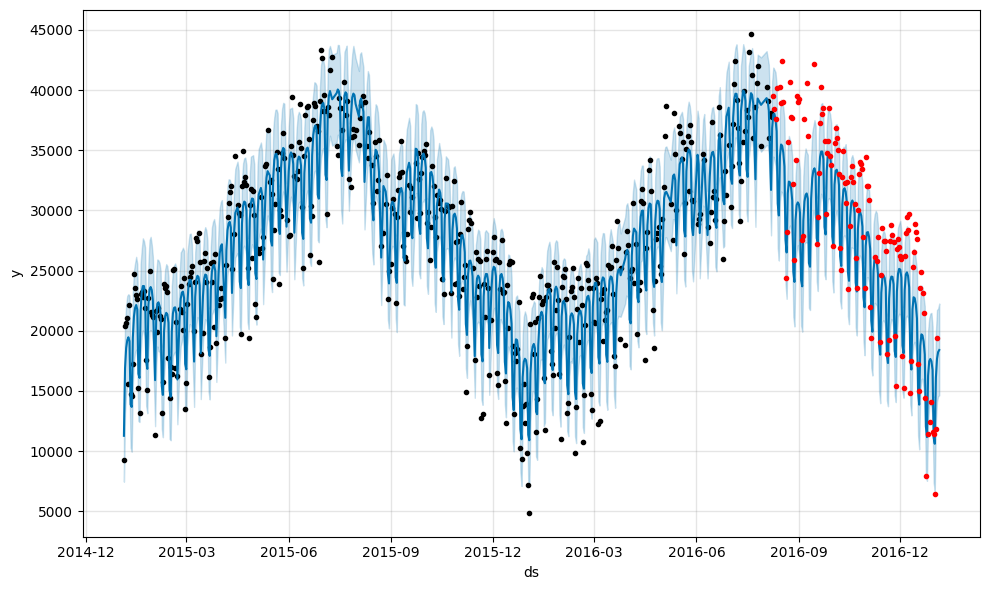

In [282]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

In [283]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on = 'ds')
df_comparacao

,ds,yhat,y
0,2016-08-09,37974.130320,39514
1,2016-08-10,38025.246169,38430
2,2016-08-11,37612.703346,37626
3,2016-08-12,36575.602443,40159
4,2016-08-15,34515.934792,40236
...,...,...,...
121,2016-12-30,16736.631533,11566
122,2016-12-31,11120.510804,11424
123,2017-01-01,10603.484403,6421
124,2017-01-02,16090.795109,11823


In [284]:
mse = np.sqrt(mean_squared_error(df_comparacao['y'], df_comparacao['yhat']))

print(f'RMSE: {round(mse, 3)}')

RMSE: 3934.137


In [ ]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality = True)
modelo_sem_outliers.fit(df_treino)

futuro = modelo_sem_outliers.make_future_dataframe(periods = 365, freq = 'D')
previsao = modelo_sem_outliers.predict(futuro)

In [287]:
fig = plot_plotly(modelo_sem_outliers, previsao)
fig.show()